In [1]:
# import requirements library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset
data = pd.read_csv("C:/Users/Gilbert/Documents/Fifth Semester/Artificial Intelligence and Machine Learning/Activities/Hypertension_EDA/data/hypertension.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# get the shape of the dataset
data.shape

(26083, 14)

In [5]:
# get info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [6]:
# get statistical summary
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check for missing data
missing_data = data.isnull().sum()

missing_data

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [8]:
drop_list = ['sex']
data = data.drop(columns=drop_list)

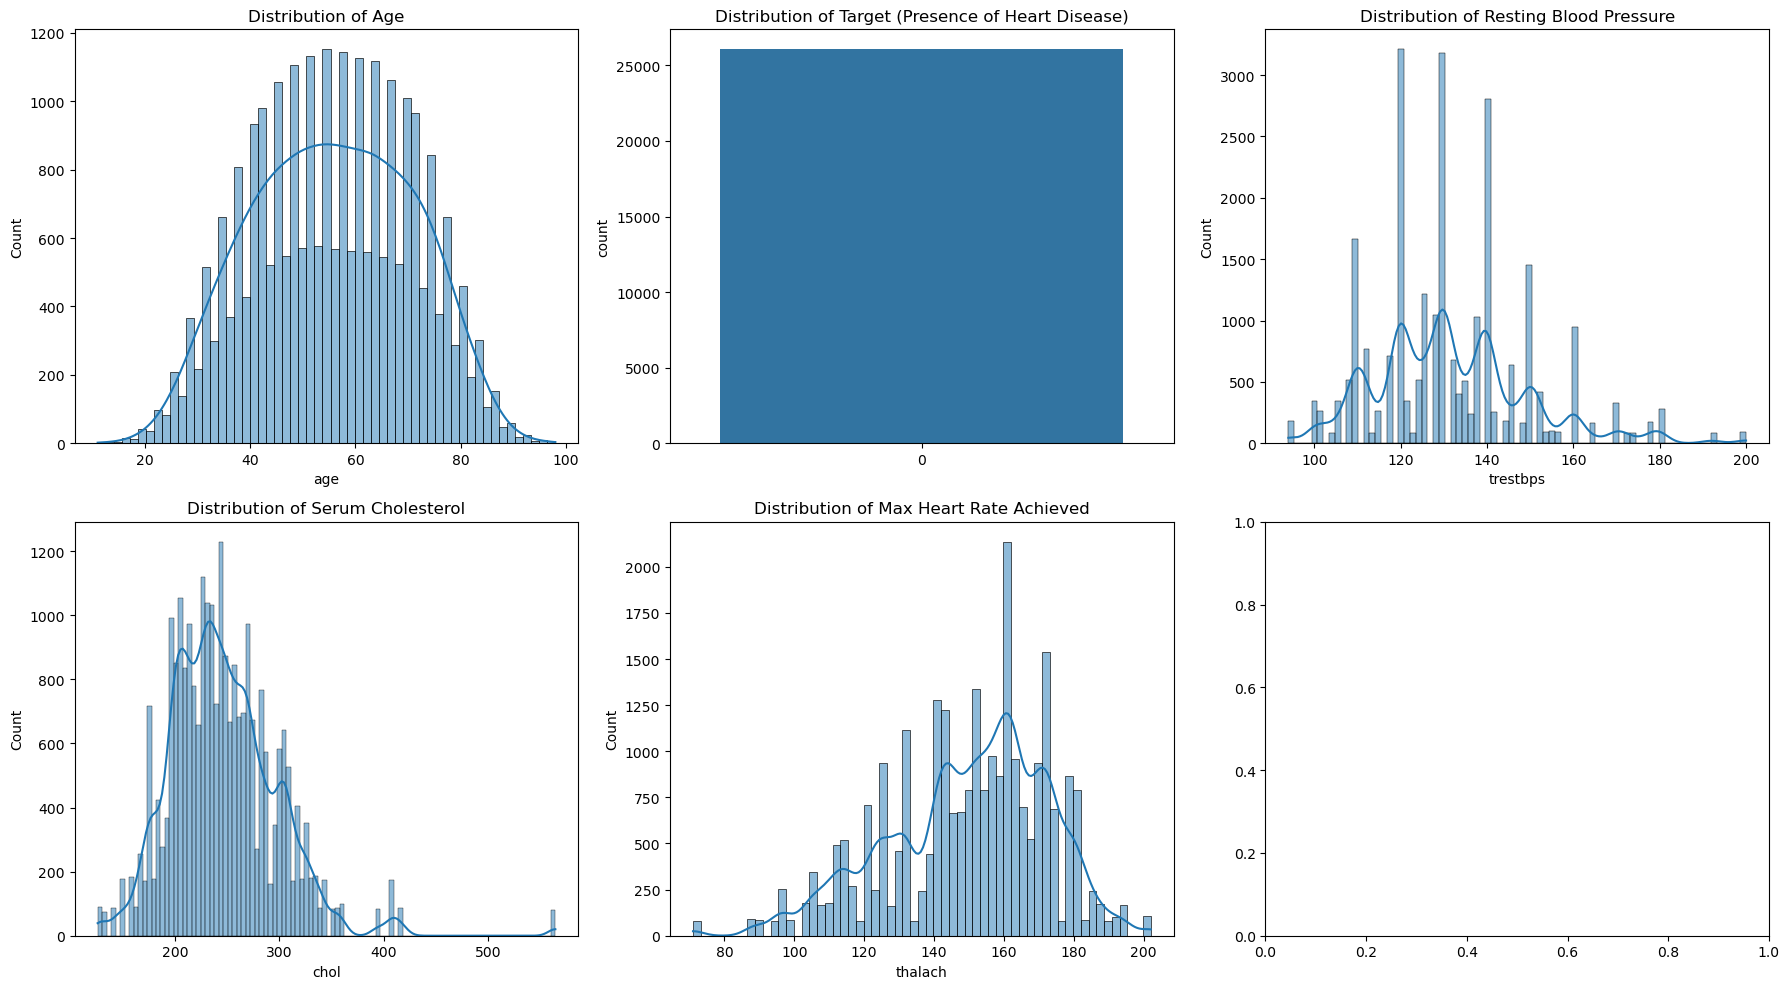

(26083, 13)

In [9]:
# Drop rows with missing data
data_cleaned = data.dropna()

# Check the new shape of the dataset
new_shape = data_cleaned.shape

# Set up the matplotlib figure
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Age distribution
sns.histplot(data_cleaned['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age')

# Target distribution
sns.countplot(data_cleaned['target'], ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Target (Presence of Heart Disease)')

# Distribution of resting blood pressure
sns.histplot(data_cleaned['trestbps'], kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Distribution of Resting Blood Pressure')

# Distribution of serum cholesterol
sns.histplot(data_cleaned['chol'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Serum Cholesterol')

# Distribution of max heart rate achieved
sns.histplot(data_cleaned['thalach'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Max Heart Rate Achieved')

plt.tight_layout()
plt.show()

new_shape

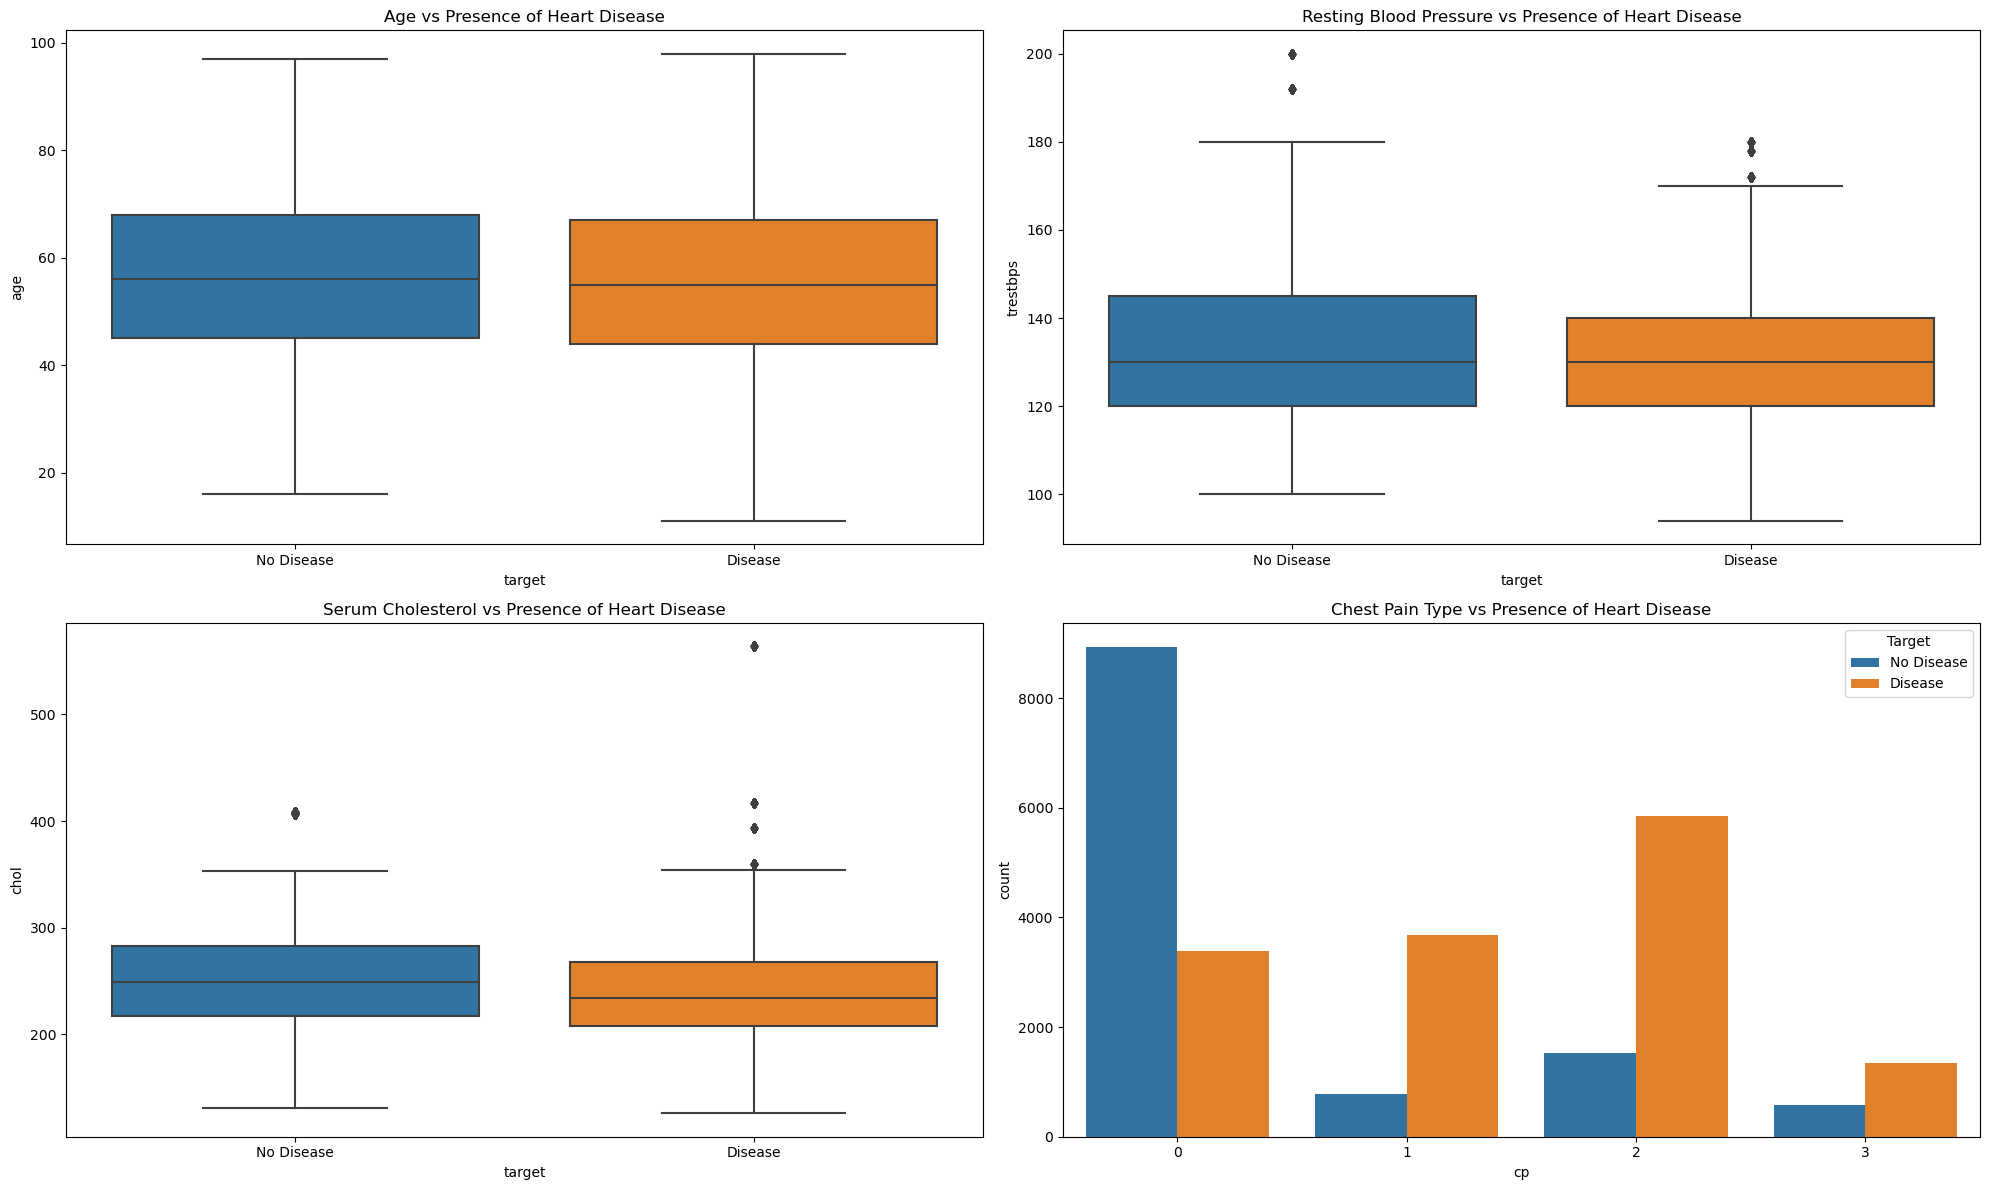

In [10]:
# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Age vs Target
sns.boxplot(x='target', y='age', data=data_cleaned, ax=axs[0, 0])
axs[0, 0].set_title('Age vs Presence of Heart Disease')
axs[0, 0].set_xticklabels(['No Disease', 'Disease'])

# Resting Blood Pressure vs Target
sns.boxplot(x='target', y='trestbps', data=data_cleaned, ax=axs[0, 1])
axs[0, 1].set_title('Resting Blood Pressure vs Presence of Heart Disease')
axs[0, 1].set_xticklabels(['No Disease', 'Disease'])

# Serum Cholesterol vs Target
sns.boxplot(x='target', y='chol', data=data_cleaned, ax=axs[1, 0])
axs[1, 0].set_title('Serum Cholesterol vs Presence of Heart Disease')
axs[1, 0].set_xticklabels(['No Disease', 'Disease'])

# Chest Pain Type vs Target
sns.countplot(x='cp', hue='target', data=data_cleaned, ax=axs[1, 1])
axs[1, 1].set_title('Chest Pain Type vs Presence of Heart Disease')
axs[1, 1].legend(title='Target', labels=['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

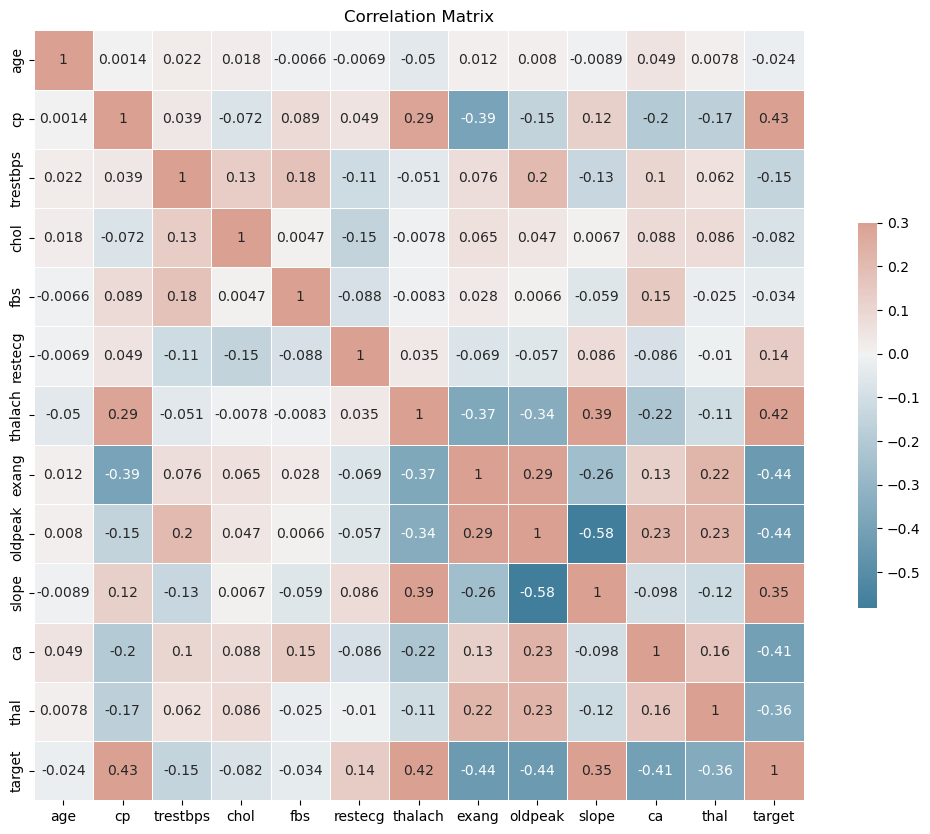

In [11]:
# Compute the correlation matrix
corr_matrix = data_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix')
plt.show()

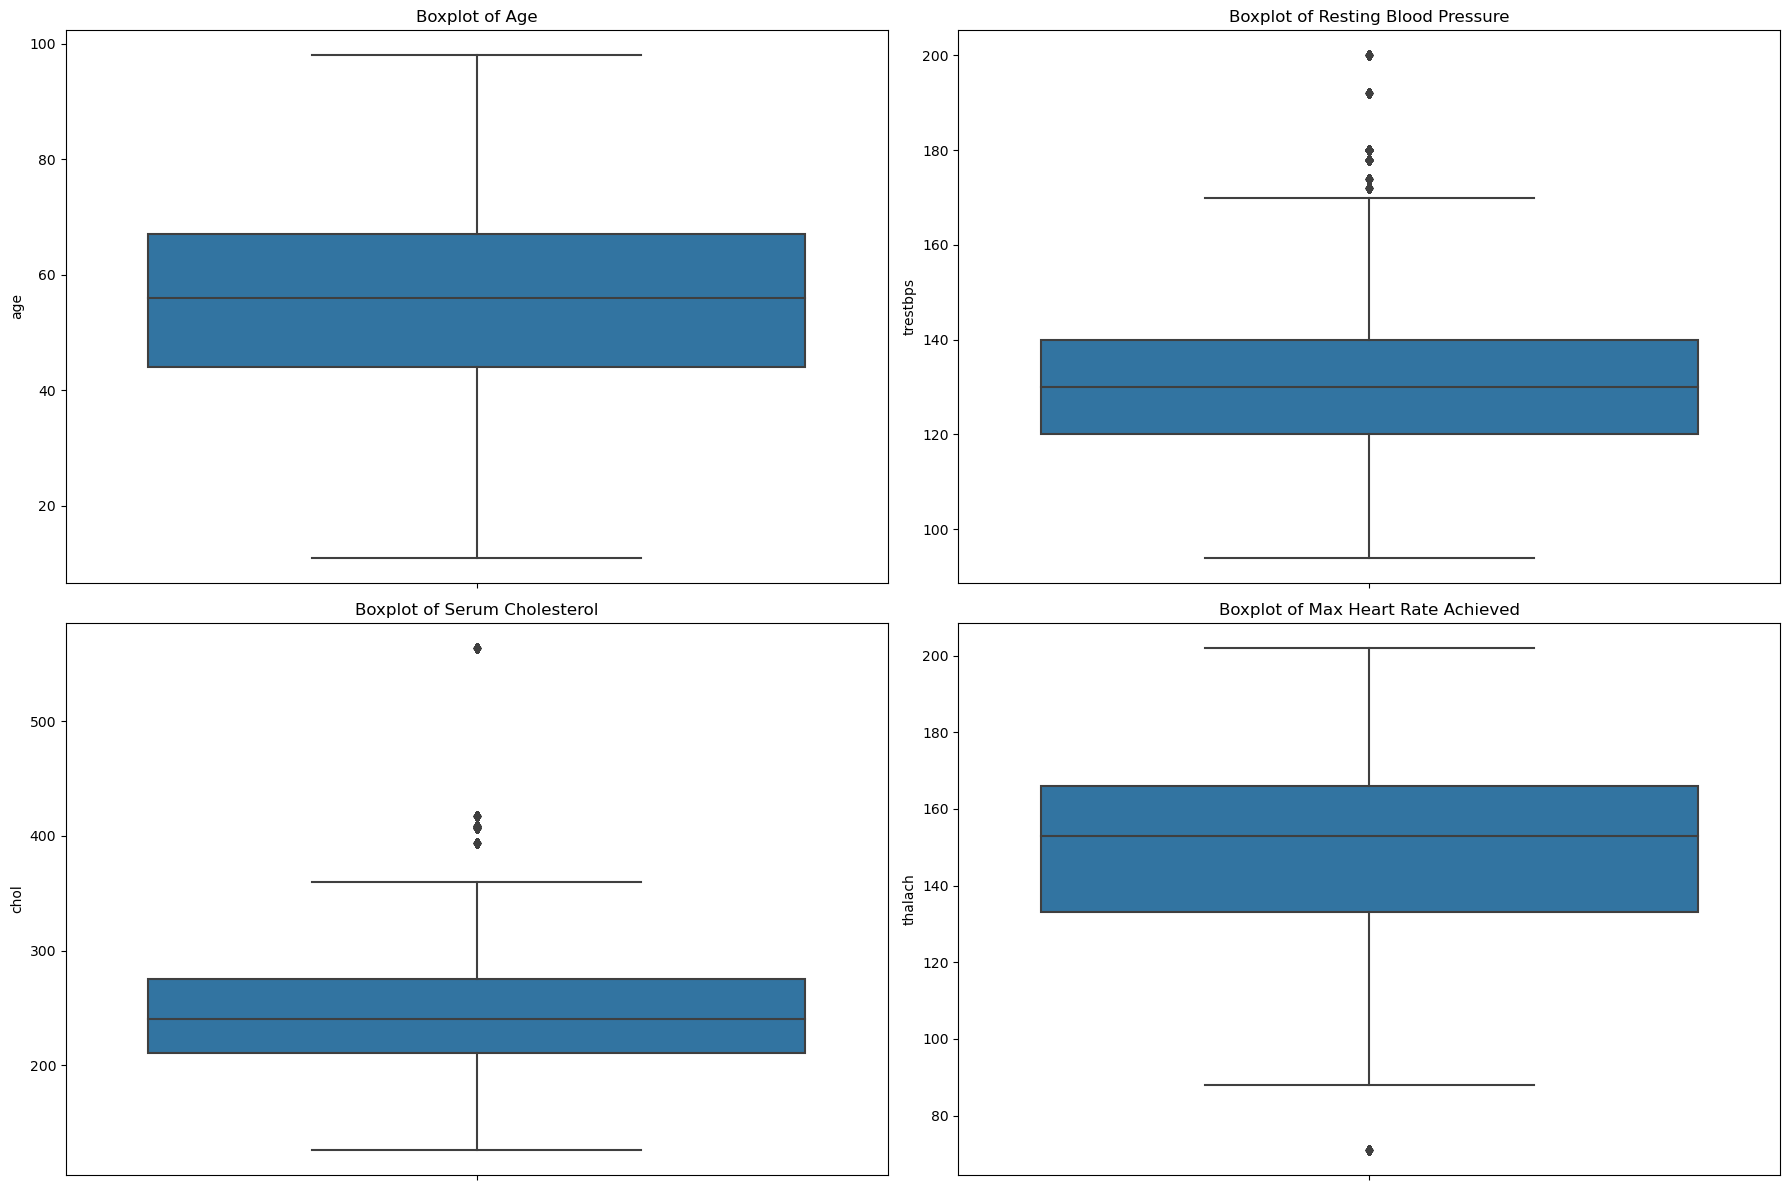

In [12]:
# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot boxplot for age
sns.boxplot(y=data_cleaned['age'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Age')

# Plot boxplot for resting blood pressure
sns.boxplot(y=data_cleaned['trestbps'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Resting Blood Pressure')

# Plot boxplot for serum cholesterol
sns.boxplot(y=data_cleaned['chol'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Serum Cholesterol')

# Plot boxplot for max heart rate achieved
sns.boxplot(y=data_cleaned['thalach'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of Max Heart Rate Achieved')

plt.tight_layout()
plt.show()


In [13]:
# Define a function to get the lower and upper bounds for outliers
def get_outlier_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get outlier bounds for relevant columns
trestbps_bounds = get_outlier_bounds(data_cleaned['trestbps'])
chol_bounds = get_outlier_bounds(data_cleaned['chol'])
thalach_bounds = get_outlier_bounds(data_cleaned['thalach'])

# Remove outliers
data_no_outliers = data_cleaned[
    (data_cleaned['trestbps'].between(*trestbps_bounds)) &
    (data_cleaned['chol'].between(*chol_bounds)) &
    (data_cleaned['thalach'].between(*thalach_bounds))
]

# Check the shape of the dataset after removing outliers
data_no_outliers.shape


(24783, 13)

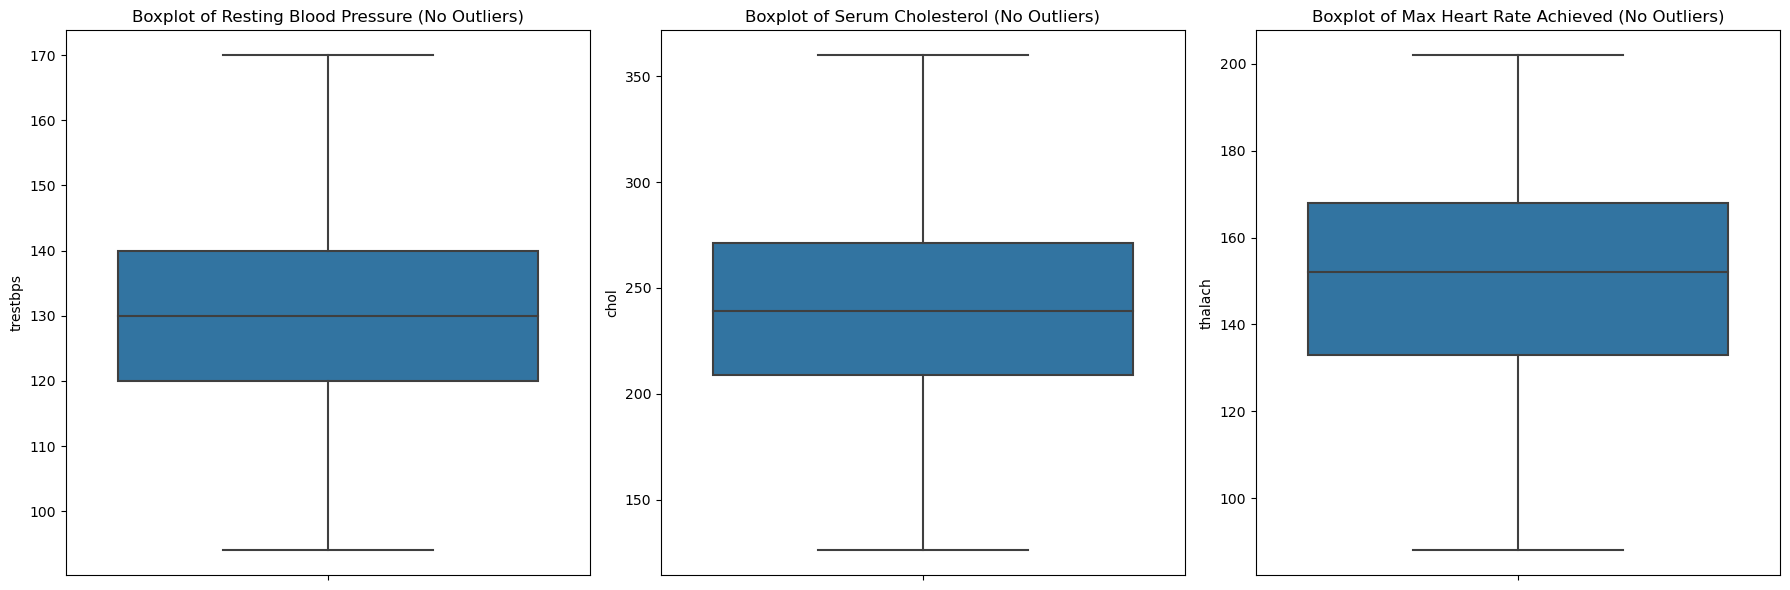

In [14]:
# Set up the matplotlib figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot boxplot for resting blood pressure after removing outliers
sns.boxplot(y=data_no_outliers['trestbps'], ax=axs[0])
axs[0].set_title('Boxplot of Resting Blood Pressure (No Outliers)')

# Plot boxplot for serum cholesterol after removing outliers
sns.boxplot(y=data_no_outliers['chol'], ax=axs[1])
axs[1].set_title('Boxplot of Serum Cholesterol (No Outliers)')

# Plot boxplot for max heart rate achieved after removing outliers
sns.boxplot(y=data_no_outliers['thalach'], ax=axs[2])
axs[2].set_title('Boxplot of Max Heart Rate Achieved (No Outliers)')

plt.tight_layout()
plt.show()
